# Overview
The following code introduces a number of visualization utility functions that were eventually ported to `Schrodinger_Network.ipynb`. It doesn't need to be run, but has been included for completeness.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import imageio

In [2]:
def create_gif(frames, fname='output.gif'):
    for i, frame in enumerate(frames):
        plt.imshow(frame, cmap='inferno')
        plt.title(f'Frame {i}')
        plt.savefig(f'./frame{i}.png')
        plt.pause(0.5)

    gif = []
    for i, frame in enumerate(frames):
        image = imageio.imread(f'./frame{i}.png')
        gif.append(image)

    imageio.mimsave('./' + fname, # output gif
                gif,          # array of input frames
                fps = 5)         # optional: frames per second

In [3]:
frame = np.linspace(0, 32, num=1024, endpoint=False).reshape(32, 32)

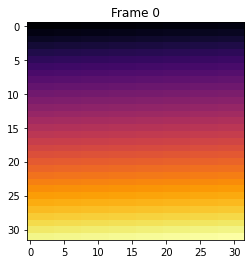

In [4]:
create_gif([frame])

In [5]:
frames = []

coords = [[i // 32, i % 32] for i in range(32 * 32)]
for radius in range(10):
    dist = multivariate_normal((16, 16), np.eye(2) * radius * 4, allow_singular=True)

    frame = dist.pdf(coords).reshape(32, 32)

    frames.append(frame)

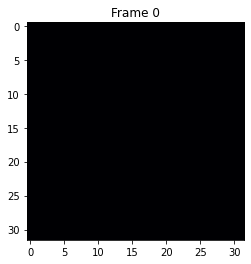

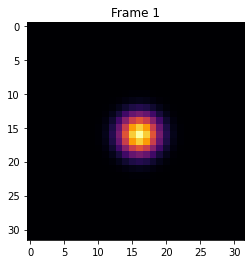

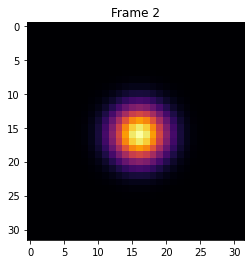

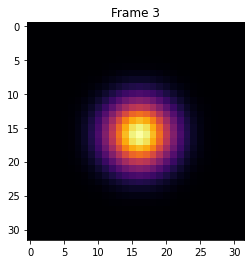

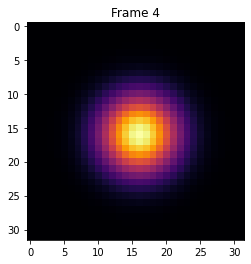

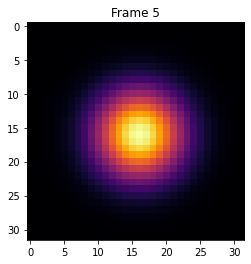

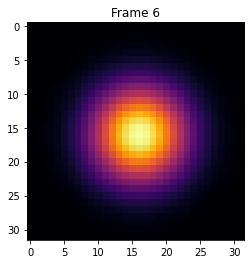

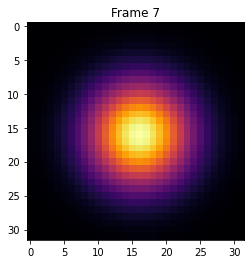

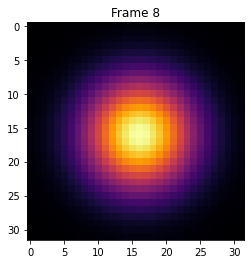

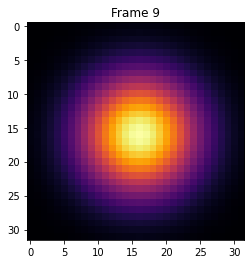

In [17]:
create_gif(frames)

In [42]:
def compare_frames(f1, f2):
    fig, axes = plt.subplots(3, 2)
    print(f1[0])
    axes[0, 0].imshow(f1[0], cmap='inferno')
    axes[1, 0].imshow(f1[1], cmap='inferno')
    axes[0, 1].imshow(f2[0], cmap='inferno')
    axes[1, 1].imshow(f2[0], cmap='inferno')

    axes[2, 0].imshow(np.power(f1[0], 2) + np.power(f1[1], 2), cmap='inferno')
    axes[2, 1].imshow(np.power(f2[0], 2) + np.power(f2[1], 2), cmap='inferno')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


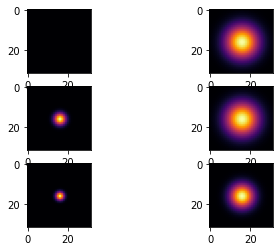

In [43]:
compare_frames([frames[0], frames[1]], [frames[8], frames[9]])